In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
hyprcoloc_results = pd.read_csv("../code/hyprcoloc/Results/transcripts_10.ForGWASColoc/GWAS_GTEx_01/results.txt.gz", 
                                sep='\t')

annotation = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/annotated.snmf.merged_isoforms.tab.gz', sep='\t')
annotation['gene_id'] = annotation.transcript.apply(lambda x: x.split('.')[0])
second_annotation = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/second_annotation.snmf.merged_isoforms.tab.gz', sep='\t',
                               names = ['gene', 'transcript', 'chain', 'ref_transcript', 'intron_retention', 'utr'])


In [45]:
hyprcoloc_results['GWAS_trait'] = hyprcoloc_results.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.apply(lambda x: '_'.join(x.split('_')[2:]))

trait_coloc = []
for idx, row in hyprcoloc_results.iterrows():
    trait = row.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait
    try:
        trait_coloc.append(trait in row.ColocalizedTraits)
    except:
        trait_coloc.append(False)

hyprcoloc_results['coloc'] = trait_coloc

In [46]:
hyprcoloc_results.loc[hyprcoloc_results.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait == 'chr22_45887417_GCST004988']

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
47524,chr22_45887417_GCST004988,1,"Brain_Cortex;ENSG00000075234.isoform_6, Heart_...",0.7608,1.0000,chr22_46287058_C_T_b38,0.0918,NaN,GCST004988,False,False
47525,chr22_45887417_GCST004988,2,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.3777,0.6743,chr22_46291323_G_A_b38,0.0574,NaN,GCST004988,False,False
47526,chr22_45887417_GCST004988,3,"Lung;ENSG00000077942.isoform_1, Skin_Not_Sun_E...",0.9774,0.9988,chr22_45558650_G_A_b38,0.4047,NaN,GCST004988,False,False
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False,True
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False
47531,chr22_45887417_GCST004988,8,NaN,NaN,0.0067,NaN,NaN,Muscle_Skeletal;ENSG00000075234.isoform_7,GCST004988,False,False


In [47]:
45887417 - 46287058

-399641

In [44]:
(hyprcoloc_results.loc[~hyprcoloc_results.DroppedTrait.apply(lambda x: 'chr' in str(x))].groupby('GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait').coloc.sum() > 0).mean()

0.11955405603637964

In [6]:
dropped_trait = []
for idx, row in hyprcoloc_results.iterrows():
    if str(row.DroppedTrait) == 'nan':
        dropped_trait.append(False)
    else:
        dropped_trait.append(row.GWAS_trait in row.DroppedTrait)

hyprcoloc_results['Dropped_GWAS_trait'] = dropped_trait

In [7]:
(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait').coloc.sum() > 0).mean()

0.11955405603637964

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 [Text(0, 0, 'total_cerebral_volume'),
  Text(1, 0, 'Tau_protein_presence_in_body_fluid'),
  Text(2, 0, 'cardioembolic_stroke'),
  Text(3, 0, 'cerebral_aneurysm'),
  Text(4, 0, 'cerebrospinal_fluid_p-tau_levels_in_APOE_e4_carriers'),
  Text(5, 0, 'childhood_absence_epilepsy'),
  Text(6, 0, 'epilepsy'),
  Text(7, 0, 'intracerebral_hemorrhage'),
  Text(8, 0, 'genetic_generalized_epilepsy'),
  Text(9, 0, 'amyotrophic_lateral_sclerosis'),
  Text(10, 0, 'migraine'),
  Text(11, 0, 'large_artery_stroke'),
  Text(12, 0, 'GCST004605'),
  Text(13, 0, 

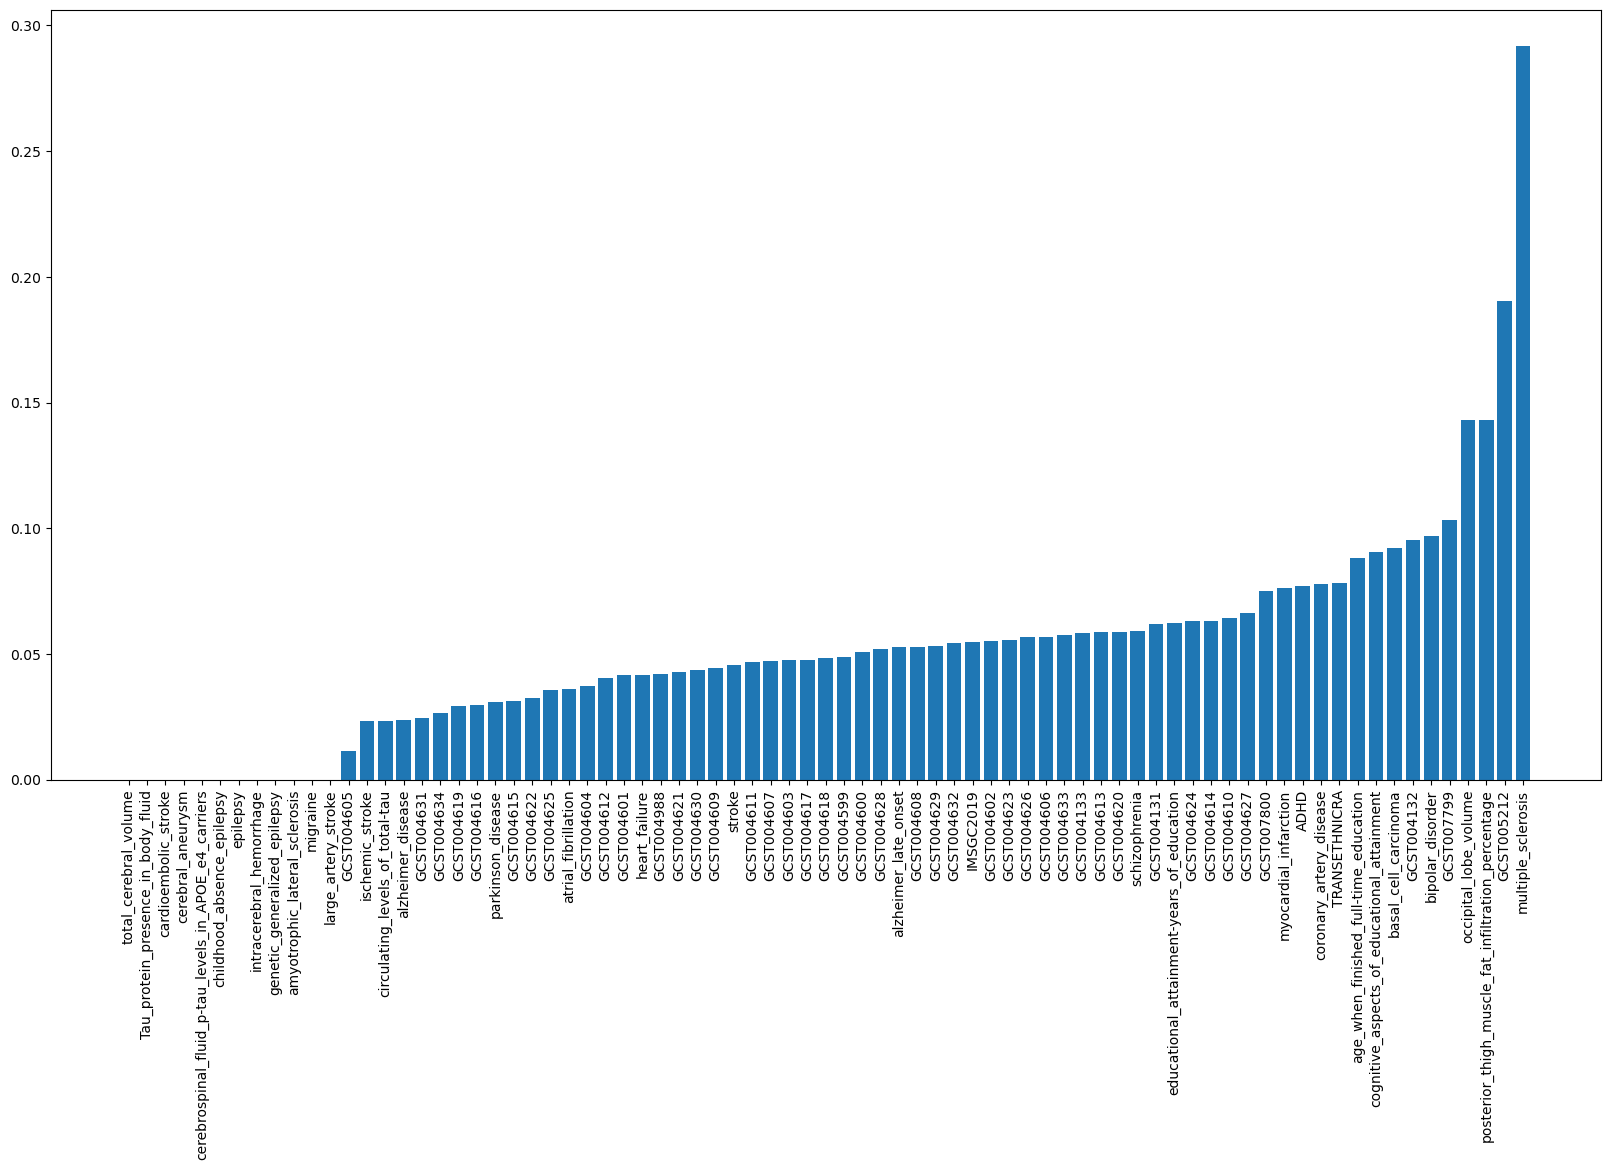

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(hyprcoloc_results.loc[hyprcoloc_results.DroppedTrait.isna()].groupby('GWAS_trait').coloc.mean().sort_values().index, hyprcoloc_results.loc[hyprcoloc_results.DroppedTrait.isna()].groupby('GWAS_trait').coloc.mean().sort_values())
plt.xticks(rotation=90)

In [25]:
hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait]#.groupby('GWAS_trait').coloc.mean().sort_values()

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
2,chr1_2594226_multiple_sclerosis,1,"Brain_Cortex;ENSG00000157881.isoform_3, Lung;E...",0.9485,0.9990,chr1_2514891_A_G_b38,0.3951,NaN,multiple_sclerosis,False,False
4,chr1_2594226_multiple_sclerosis,3,NaN,NaN,0.0024,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic;ENSG0000011615...,multiple_sclerosis,False,False
5,chr1_2594226_multiple_sclerosis,4,NaN,NaN,0.0006,NaN,NaN,Brain_Putamen_basal_ganglia;ENSG00000067606.is...,multiple_sclerosis,False,False
6,chr1_2594226_multiple_sclerosis,5,NaN,NaN,0.0004,NaN,NaN,Liver;ENSG00000116151.isoform_2,multiple_sclerosis,False,False
7,chr1_2594226_multiple_sclerosis,6,NaN,NaN,0.0002,NaN,NaN,Brain_Frontal_Cortex_BA9;ENSG00000067606.isofo...,multiple_sclerosis,False,False
...,...,...,...,...,...,...,...,...,...,...,...
47526,chr22_45887417_GCST004988,3,"Lung;ENSG00000077942.isoform_1, Skin_Not_Sun_E...",0.9774,0.9988,chr22_45558650_G_A_b38,0.4047,NaN,GCST004988,False,False
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False


In [23]:
hyprcoloc_results

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
0,chr1_116537544_multiple_sclerosis,1,NaN,NaN,0.0154,NaN,NaN,chr1_116537544_multiple_sclerosis,multiple_sclerosis,False,True
1,chr1_192572342_multiple_sclerosis,1,NaN,NaN,0.0138,NaN,NaN,chr1_192572342_multiple_sclerosis,multiple_sclerosis,False,True
2,chr1_2594226_multiple_sclerosis,1,"Brain_Cortex;ENSG00000157881.isoform_3, Lung;E...",0.9485,0.9990,chr1_2514891_A_G_b38,0.3951,NaN,multiple_sclerosis,False,False
3,chr1_2594226_multiple_sclerosis,2,NaN,NaN,0.0162,NaN,NaN,chr1_2594226_multiple_sclerosis,multiple_sclerosis,False,True
4,chr1_2594226_multiple_sclerosis,3,NaN,NaN,0.0024,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic;ENSG0000011615...,multiple_sclerosis,False,False
...,...,...,...,...,...,...,...,...,...,...,...
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False,True
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False


In [27]:
 hyprcoloc_results.loc[hyprcoloc_results.DroppedTrait.isna()].groupby('GWAS_trait').coloc.sum().sum()

815

In [28]:
hyprcoloc_results

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
0,chr1_116537544_multiple_sclerosis,1,NaN,NaN,0.0154,NaN,NaN,chr1_116537544_multiple_sclerosis,multiple_sclerosis,False,True
1,chr1_192572342_multiple_sclerosis,1,NaN,NaN,0.0138,NaN,NaN,chr1_192572342_multiple_sclerosis,multiple_sclerosis,False,True
2,chr1_2594226_multiple_sclerosis,1,"Brain_Cortex;ENSG00000157881.isoform_3, Lung;E...",0.9485,0.9990,chr1_2514891_A_G_b38,0.3951,NaN,multiple_sclerosis,False,False
3,chr1_2594226_multiple_sclerosis,2,NaN,NaN,0.0162,NaN,NaN,chr1_2594226_multiple_sclerosis,multiple_sclerosis,False,True
4,chr1_2594226_multiple_sclerosis,3,NaN,NaN,0.0024,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic;ENSG0000011615...,multiple_sclerosis,False,False
...,...,...,...,...,...,...,...,...,...,...,...
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False,True
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 [Text(0, 0, 'total_cerebral_volume'),
  Text(1, 0, 'amyotrophic_lateral_sclerosis'),
  Text(2, 0, 'autism_spectrum_disorder'),
  Text(3, 0, 'cardioembolic_stroke'),
  Text(4, 0, 'cerebral_aneurysm'),
  Text(5, 0, 'cerebrospinal_fluid_p-tau_levels'),
  Text(6, 0, 'cerebrospinal_fluid_p-tau_levels_in_APOE_e4_carriers'),
  Text(7, 0, 'cerebrospinal_fluid_p-tau_levels_in_APOE_e4_non-carriers'),
  Text(8, 0, 'cerebrospinal_fluid_p-tau_levels_in_abnormal_amyloid_levels'),
  Text(9, 0, 'cerebrospinal_fluid_p-tau

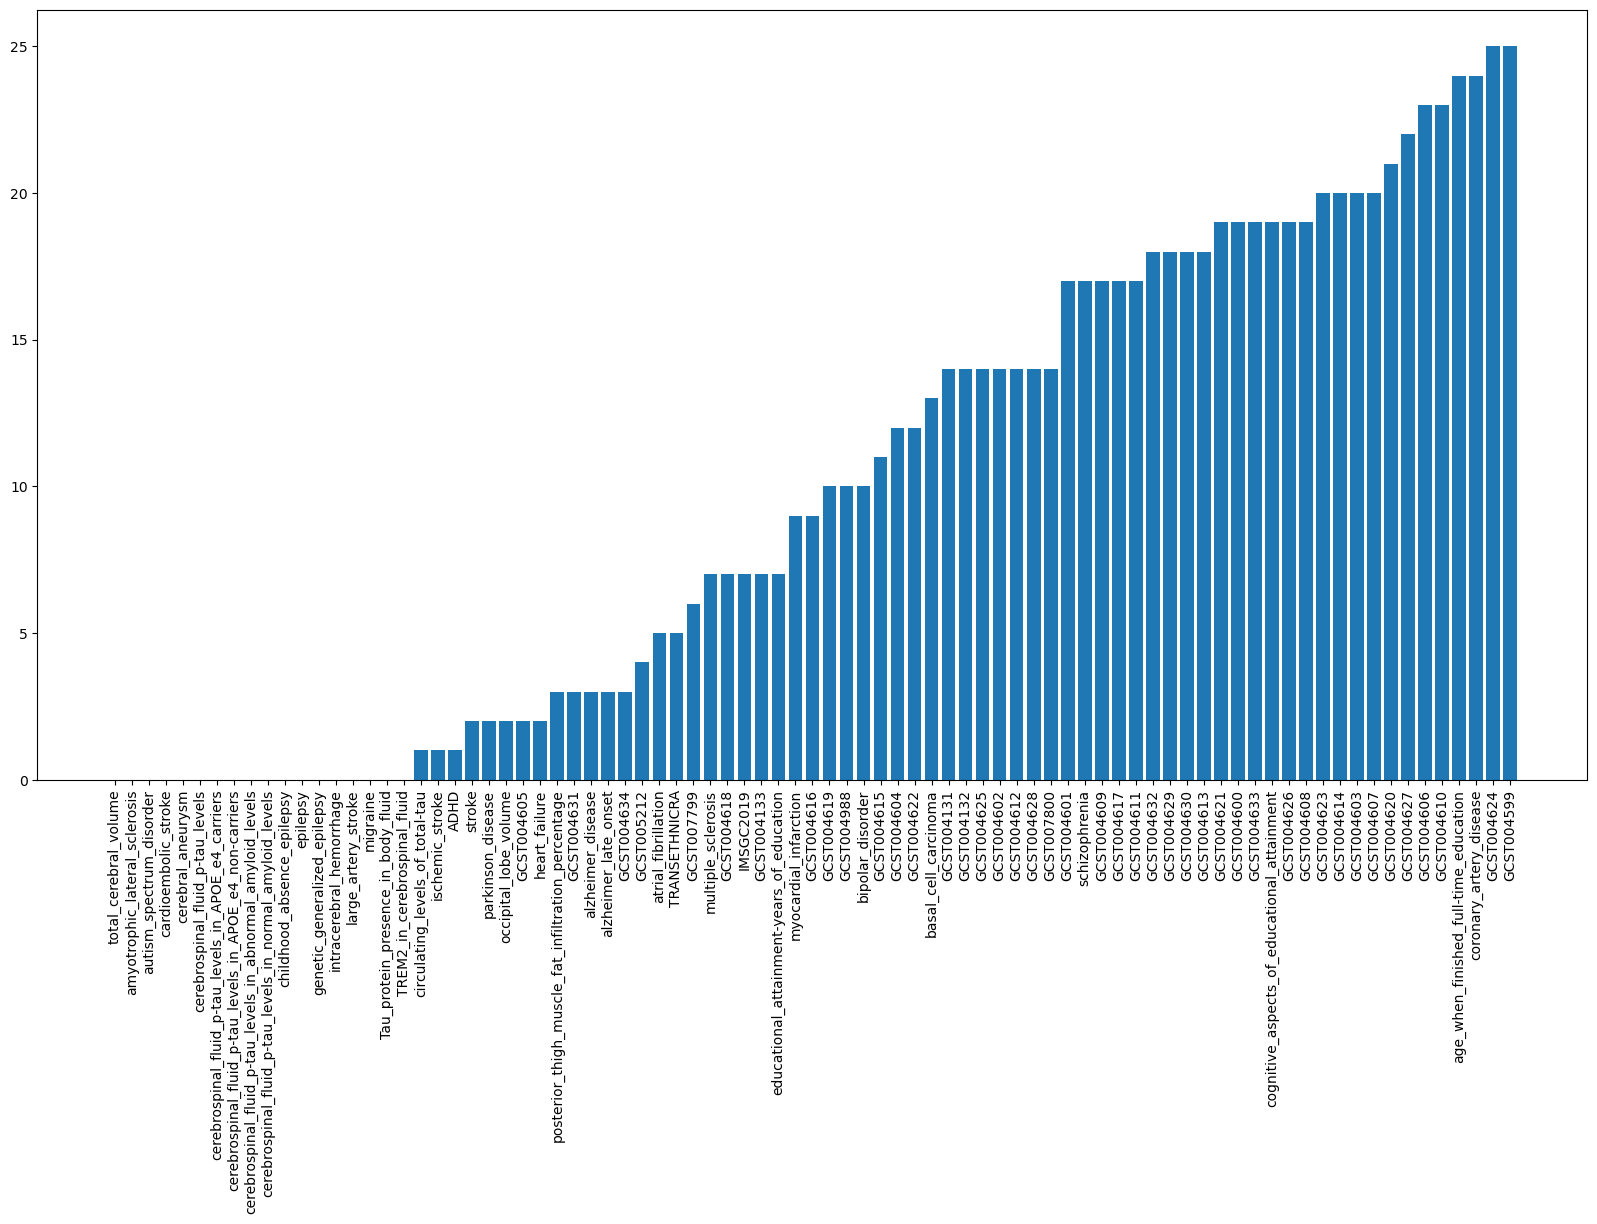

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values().index, hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values())
plt.xticks(rotation=90)

In [79]:
len(hyprcoloc_results.loc[hyprcoloc_results.GWAS_trait == 'total_cerebral_volume'].GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.unique())

7

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values().index, hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values())
plt.xticks(rotation=90)

In [48]:
cassette_exons = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/cassette_exons.bed.gz', sep='\t')

ce_transcripts = []
for tr in list(cassette_exons.transcripts):
    ce_transcripts.extend(tr.split('|'))

In [57]:
trait_annotations = {}
for trait, df in hyprcoloc_results.groupby('GWAS_trait'):
    trait_dir = {'ir':0, 
                 'utr':0,
                 'other':0,
                 'cassette':0,
                 'multiple':0,
                 'ir_utr':0,
                 'ir_cassette':0,
                 'cassette_utr':0,
                 'coloc_counter':0,
                 'percentage_coloc':0,
                 'counter':0}

    trait_dir['counter'] = len(hyprcoloc_results.loc[(hyprcoloc_results.GWAS_trait == trait) & (~hyprcoloc_results.Dropped_GWAS_trait)].GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.unique())
    
    for x in list(df.loc[df.coloc == True].ColocalizedTraits):
        add_ir = False
        add_cassette = False
        add_utr = False
        
        
        traits = x.split(', ')
        isoforms = sorted(set([y.split(';')[1] for y in traits if 'ENS' in y]))
        if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].intron_retention != 'no_intron_retention') > 0:
            add_ir = True
        if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].utr != 'no_utr') > 0:
            add_utr = True
        for iso in isoforms:
            if iso in ce_transcripts:
                add_cassette = True
        if (add_cassette) and (not add_utr) and (not add_ir):
            trait_dir['cassette'] += 1
        elif (add_cassette) and (add_utr) and (not add_ir):
            trait_dir['cassette_utr'] += 1
        elif (add_cassette) and (not add_utr) and (add_ir):
            trait_dir['ir_cassette'] += 1
        elif (add_cassette) and (add_utr) and (add_ir):
            trait_dir['multiple'] += 1
        elif (not add_cassette) and (add_utr) and (not add_ir):
            trait_dir['utr'] += 1
        elif (not add_cassette) and (add_utr) and (add_ir):
            trait_dir['ir_utr'] += 1
        elif (not add_cassette) and (not add_utr) and (add_ir):
            trait_dir['ir'] += 1
        else:
            trait_dir['other'] += 1

        trait_dir['coloc_counter'] += 1

    if trait_dir['counter'] > 0:

        trait_dir['percentage_coloc'] = trait_dir['coloc_counter']/trait_dir['counter']
    
    trait_annotations.update({trait:trait_dir})

In [118]:
trait_df = pd.DataFrame(trait_annotations).T
trait_df = trait_df.loc[trait_df.counter > 0].sort_values('percentage_coloc')

In [214]:
trait_df.sort_values('percentage_coloc')

,ir,utr,other,cassette,multiple,ir_utr,ir_cassette,cassette_utr,coloc_counter,percentage_coloc,counter
total_cerebral_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.0
large_artery_stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
migraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.0
cardioembolic_stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
intracerebral_hemorrhage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
basal_cell_carcinoma,2.0,2.0,1.0,3.0,1.0,0.0,4.0,0.0,13.0,0.209677,62.0
bipolar_disorder,1.0,0.0,1.0,2.0,1.0,1.0,3.0,1.0,10.0,0.217391,46.0
multiple_sclerosis,3.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,7.0,0.250000,28.0
GCST005212,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0.307692,13.0


(0.0, 0.35)

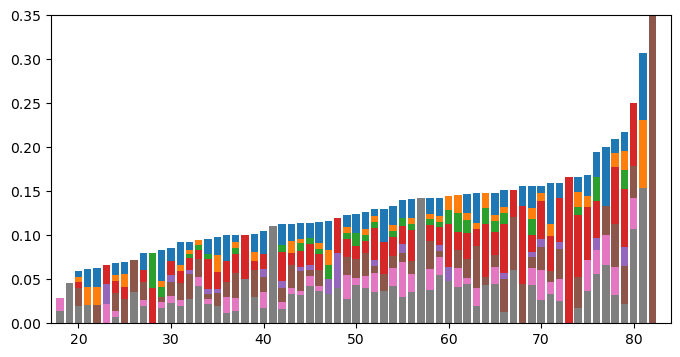

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter)+ (trait_df.multiple/trait_df.counter)+ (trait_df.other/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter)+ (trait_df.multiple/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) )
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) )

ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter))

ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter))
ax.bar(range(83),trait_df.ir/trait_df.counter)

ax.set_xlim((17, 84))
ax.set_ylim((0, 0.35))

[]

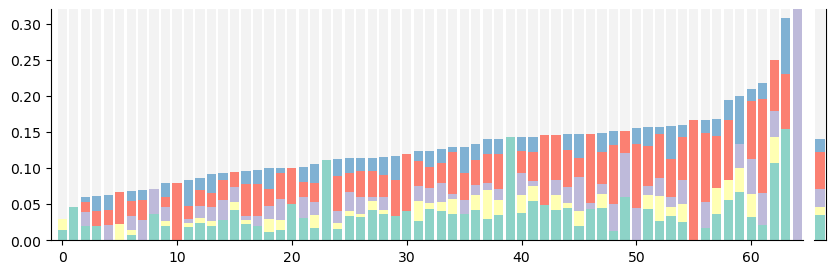

In [234]:
trait_selected_df = trait_df.loc[(trait_df.percentage_coloc > 0)]
colores = sns.color_palette('Set3')
r = trait_selected_df.shape[0]
fig, axes = plt.subplots(ncols = 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10,0.15], 'wspace': 0.03})
# ax.bar(range(69), [1]*69, color='tab:gray', alpha=0.3)

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),trait_selected_df.percentage_coloc, color=colores[4])
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter, color=colores[2])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter, color=colores[1])
axes[0].bar(range(r),trait_selected_df.ir/trait_selected_df.counter, color=colores[0])

axes[0].set_xlim((-1, r-0.5))
axes[0].set_ylim((0, 0.32))

mean_all = trait_selected_df.percentage_coloc.mean()
mean_multiple = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter).mean()
mean_cassette = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter).mean()
mean_utr = ((trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter).mean()
mean_ir = ((trait_selected_df.ir)/trait_selected_df.counter).mean()

axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[1].bar([0], [mean_all], color=colores[4])
axes[1].bar([0], [mean_multiple], color=colores[3])
axes[1].bar([0], [mean_cassette], color=colores[2])
axes[1].bar([0], [mean_utr], color=colores[1])
axes[1].bar([0], [mean_ir], color=colores[0])

axes[1].set_ylim((0, 0.32))

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['left', 'top']].set_visible(False)

axes[1].set_yticks([])
axes[1].set_xticks([])


In [236]:
gwas_names = pd.read_csv('/project2/yangili1/bjf79/ChromatinSplicingQTLs/code/config/gwas_table2.tsv', sep='\t')

In [237]:
gwas_names

,gwas,trait,FTPPath,SummaryStatsLocalFilepath,ProcessingMethod,Continuous,csv,First Author,PubMed ID,Publication date,Journal,Title,Trait(s),Data access
0,GCST004131,Inflammatory bowel disease,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,inflammatory bowel disease,FTP Download or API access
1,GCST004132,Crohn's disease,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022-2,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,crohn's disease,FTP Download or API access
2,GCST004133,Ulcerative colitis,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022-3,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,ulcerative colitis,FTP Download or API access
3,GCST004599,Mean platelet volume,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean platelet volume,NaN
4,GCST004600,Eosinophil percentage of white cells,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,eosinophil percentage of leukocytes,NaN
5,GCST004601,Red blood cell count,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,erythrocyte count,NaN
6,GCST004602,Mean corpuscular volume,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean corpuscular volume,NaN
7,GCST004603,Platelet count,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,platelet count,NaN
8,GCST004604,Hematocrit,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,hematocrit,NaN
9,GCST004605,Mean corpuscular hemoglobin concentration,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean corpuscular hemoglobin concentration,NaN


In [249]:
name_list = []
for idx in trait_selected_df.index:
    if idx.startswith('GCS'):
        new_name = gwas_names.loc[gwas_names.gwas == idx].trait.iloc[0]
    elif idx == 'IMSGC2019':
        new_name = 'Multiple sclerosis 2019'
    elif idx == 'TRANSETHNICRA':
        new_name == 'Rheumatoid arthritis'
    elif idx == 'ADHD':
        new_name == 'Attention-deficit/hyperactivity disorder'
    else:
        new_name = ' '.join(idx.capitalize().split('_'))
    name_list.append(new_name)

In [252]:
height

65

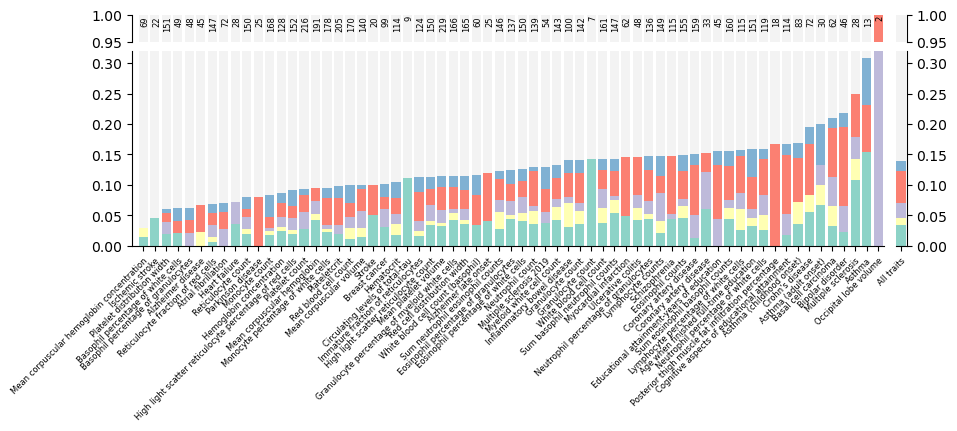

In [305]:
trait_selected_df = trait_df.loc[(trait_df.percentage_coloc > 0)]
colores = sns.color_palette('Set3')
r = trait_selected_df.shape[0]
fig, axes_ = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 3), gridspec_kw={'height_ratios': [1.4,10], 'hspace': 0.08, 'width_ratios': [10,0.15], 'wspace': 0.03})
# ax.bar(range(69), [1]*69, color='tab:gray', alpha=0.3)

axes = [axes_[0, 0], axes_[0, 1]]
axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])
axes[0].set_ylim([0.95, 1])
axes[1].set_ylim([0.95, 1])
axes[0].set_xlim((-1, r-0.5))
axes[0].spines[['right', 'top', 'bottom']].set_visible(False)
axes[1].spines[['left', 'top', 'bottom']].set_visible(False)
axes[1].yaxis.tick_right()
axes[0].set_xticks([])

axes[1].set_xticks([])

for i, n in enumerate(list(trait_selected_df.counter)):
    axes[0].text(i-0.25, 0.999, str(int(n)), rotation = 90, size=6,horizontalalignment='left',
        verticalalignment='top',)


axes = [axes_[1, 0], axes_[1, 1]]

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),trait_selected_df.percentage_coloc, color=colores[4])
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter, color=colores[2])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter, color=colores[1])
axes[0].bar(range(r),trait_selected_df.ir/trait_selected_df.counter, color=colores[0])

axes[0].set_xlim((-1, r-0.5))
axes[0].set_ylim((0, 0.32))
axes[0].set_xticks([])


mean_all = trait_selected_df.percentage_coloc.mean()
mean_multiple = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter).mean()
mean_cassette = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter).mean()
mean_utr = ((trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter).mean()
mean_ir = ((trait_selected_df.ir)/trait_selected_df.counter).mean()

axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[1].bar([0], [mean_all], color=colores[4])
axes[1].bar([0], [mean_multiple], color=colores[3])
axes[1].bar([0], [mean_cassette], color=colores[2])
axes[1].bar([0], [mean_utr], color=colores[1])
axes[1].bar([0], [mean_ir], color=colores[0])

axes[1].set_ylim((0, 0.32))

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['left', 'top']].set_visible(False)

# axes[1].set_yticks([])
axes[1].set_xticks([])

axes[1].yaxis.tick_right()

axes[0].set_xticks(range(r), name_list, rotation=45, ha='right', rotation_mode='anchor', size=6)
axes[1].set_xticks([0], ['All traits'], rotation=45, ha='right', rotation_mode='anchor', size=6)

# axes[0].plot([0, 64], [0.14, 0.14], 'r--')


plt.savefig('../code/scratch_figures/figure2/coloc_barplot.pdf', bbox_inches='tight')
plt.savefig('../code/scratch_figures/figure2/coloc_barplot.png', bbox_inches='tight', dpi=500)

In [288]:
trait_selected_df.counter

GCST004605                69.0
ischemic_stroke           22.0
GCST004616               151.0
GCST004631                49.0
GCST004634                48.0
                         ...  
basal_cell_carcinoma      62.0
bipolar_disorder          46.0
multiple_sclerosis        28.0
GCST005212                13.0
occipital_lobe_volume      2.0
Name: counter, Length: 65, dtype: float64

In [154]:
(((trait_selected_df.ir) + (trait_selected_df.ir_utr) + (trait_selected_df.ir_cassette) + (trait_selected_df.multiple))/trait_selected_df.counter).mean()

0.06913870600312806

In [155]:
(((trait_selected_df.utr) + (trait_selected_df.ir_utr) + (trait_selected_df.cassette_utr) + (trait_selected_df.multiple))/trait_selected_df.counter).mean()

0.025659469085709645

In [160]:
(((trait_selected_df.cassette) + (trait_selected_df.ir_cassette) + (trait_selected_df.cassette_utr) + (trait_selected_df.multiple))/trait_selected_df.counter).mean()

0.05479368646272558

hyprcoloc_results.loc[(hyprcoloc_results.GWAS_trait == 'occipital_lobe_volume') & (~hyprcoloc_results.Dropped_GWAS_trait)]

In [13]:
1019594 - 1025583

-5989

In [56]:
ir = 0
utr = 0
other = 0
cassette = 0
multiple = 0

ir_utr = 0
ir_cassette = 0
cassette_utr = 0

counter = 0

for x in list(hyprcoloc_results.loc[hyprcoloc_results.coloc == True].ColocalizedTraits):
    add_ir = False
    add_cassette = False
    add_utr = False
    
    counter += 1
    traits = x.split(', ')
    isoforms = sorted(set([y.split(';')[1] for y in traits if 'ENS' in y]))
    if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].intron_retention != 'no_intron_retention') > 0:
        add_ir = True
    if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].utr != 'no_utr') > 0:
        add_utr = True
    for iso in isoforms:
        if iso in ce_transcripts:
            add_cassette = True
    if (add_cassette) and (not add_utr) and (not add_ir):
        cassette += 1
    elif (add_cassette) and (add_utr) and (not add_ir):
        cassette_utr += 1
    elif (add_cassette) and (not add_utr) and (add_ir):
        ir_cassette += 1
    elif (add_cassette) and (add_utr) and (add_ir):
        multiple += 1
    elif (not add_cassette) and (add_utr) and (not add_ir):
        utr += 1
    elif (not add_cassette) and (add_utr) and (add_ir):
        ir_utr += 1
    elif (not add_cassette) and (not add_utr) and (add_ir):
        ir += 1
    else:
        other += 1

In [140]:
815/6817

0.11955405603637964

In [141]:
hyprcoloc_results

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
0,chr1_116537544_multiple_sclerosis,1,NaN,NaN,0.0154,NaN,NaN,chr1_116537544_multiple_sclerosis,multiple_sclerosis,False,True
1,chr1_192572342_multiple_sclerosis,1,NaN,NaN,0.0138,NaN,NaN,chr1_192572342_multiple_sclerosis,multiple_sclerosis,False,True
2,chr1_2594226_multiple_sclerosis,1,"Brain_Cortex;ENSG00000157881.isoform_3, Lung;E...",0.9485,0.9990,chr1_2514891_A_G_b38,0.3951,NaN,multiple_sclerosis,False,False
3,chr1_2594226_multiple_sclerosis,2,NaN,NaN,0.0162,NaN,NaN,chr1_2594226_multiple_sclerosis,multiple_sclerosis,False,True
4,chr1_2594226_multiple_sclerosis,3,NaN,NaN,0.0024,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic;ENSG0000011615...,multiple_sclerosis,False,False
...,...,...,...,...,...,...,...,...,...,...,...
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False,True
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False


In [138]:
len(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.unique())

6817

In [131]:
ir_utr

21

In [133]:
ir_cassette

171

In [130]:
other

297

In [126]:
cassette

130

In [127]:
utr

79

In [128]:
counter

815

In [129]:
ir

202

In [134]:
other

126

In [94]:
annotation.loc[annotation.transcript == 'ENSG00000071054.isoform_1']

,transcript,appris_transcript,appris_transcript_length,query_transcript_len,appris_ref,gencode_ref,gene_id
47539,ENSG00000071054.isoform_1,ENST00000324219,33,18,alt.5exon/skipped.exon/alt.ss.2,.,ENSG00000071054


In [104]:
ce_transcripts

['ENSG00000188976.isoform_1',
 'ENSG00000188976.isoform_2',
 'ENSG00000188976.isoform_4',
 'ENSG00000188976.isoform_5',
 'ENSG00000188976.isoform_6',
 'ENSG00000188976.isoform_7',
 'ENSG00000188976.isoform_6',
 'ENSG00000188976.isoform_1',
 'ENSG00000188976.isoform_4',
 'ENSG00000188976.isoform_5',
 'ENSG00000188976.isoform_7',
 'ENSG00000188976.isoform_3',
 'ENSG00000188976.isoform_1',
 'ENSG00000188976.isoform_4',
 'ENSG00000188976.isoform_5',
 'ENSG00000188976.isoform_6',
 'ENSG00000188976.isoform_7',
 'ENSG00000187961.isoform_2',
 'ENSG00000187961.isoform_3',
 'ENSG00000187961.isoform_7',
 'ENSG00000187961.isoform_8',
 'ENSG00000187583.isoform_1',
 'ENSG00000187583.isoform_3',
 'ENSG00000187583.isoform_7',
 'ENSG00000187583.isoform_8',
 'ENSG00000187583.isoform_10',
 'ENSG00000187583.isoform_1',
 'ENSG00000187583.isoform_3',
 'ENSG00000187583.isoform_8',
 'ENSG00000187583.isoform_4',
 'ENSG00000188157.isoform_4',
 'ENSG00000188157.isoform_3',
 'ENSG00000188157.isoform_4',
 'ENSG000